In [8]:
from epyt import epanet
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
n=epanet('Net1.inp')

EPANET version 20200 loaded (EPyT version 1.1.8).
Input File Net1.inp loaded successfully.



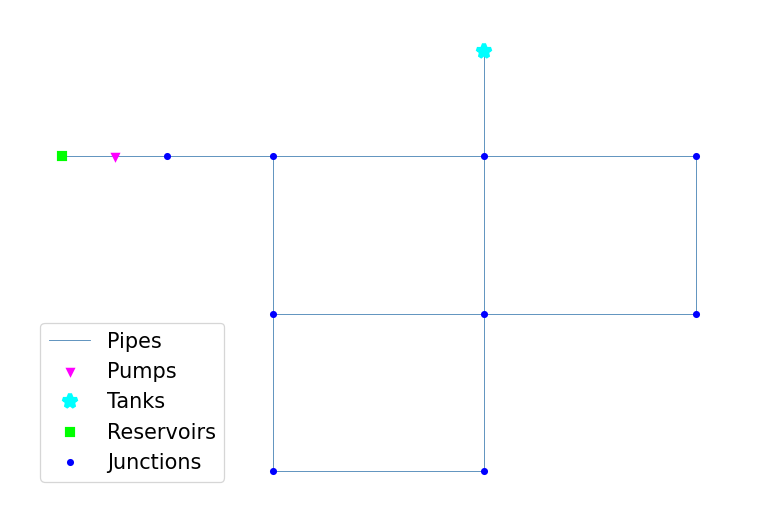

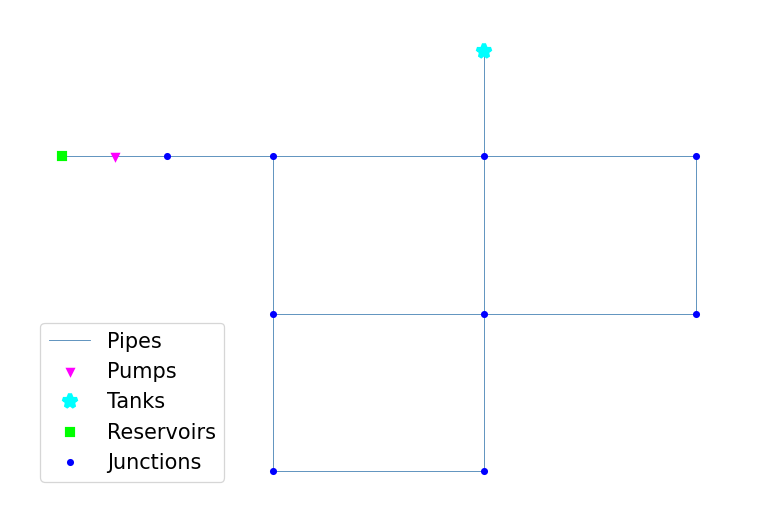

In [3]:
n.plot()

In [4]:
newindexCurve=n.addCurve('NewCurve',[1800,1500],[1500,500])

In [5]:
indexCurve

NameError: name 'indexCurve' is not defined

In [ ]:
pumpIndex=n.getLinkPumpIndex(1)

In [ ]:
pumpIndex

In [ ]:
HeadCurveIndex,PumpIndex=n.getLinkPumpHeadCurveIndex()

In [ ]:
print(f'Head Curve Index:{HeadCurveIndex}')

In [ ]:
print(f'On pump Index:{PumpIndex}')

In [ ]:
n.setLinkPumpHeadCurveIndex(pumpIndex,newindexCurve)

In [ ]:
HeadCurveIndex,PumpIndex=n.getLinkPumpHeadCurveIndex()

In [ ]:
HeadCurveIndex,PumpIndex

In [ ]:
n.saveInputFile('duplicate-Net1.inp')

In [ ]:
## Check to see the head and flowrates
d=epanet('duplicate-Net1.inp')


In [ ]:
d.runHydraulicAnalysis()
flow_rates=d.getLinkFlows()
heads=d.getNodePressure()

In [ ]:
print(flow_rates)

In [ ]:
for head in heads:
    print(head)

In [ ]:
d.closeHydraulicAnalysis()

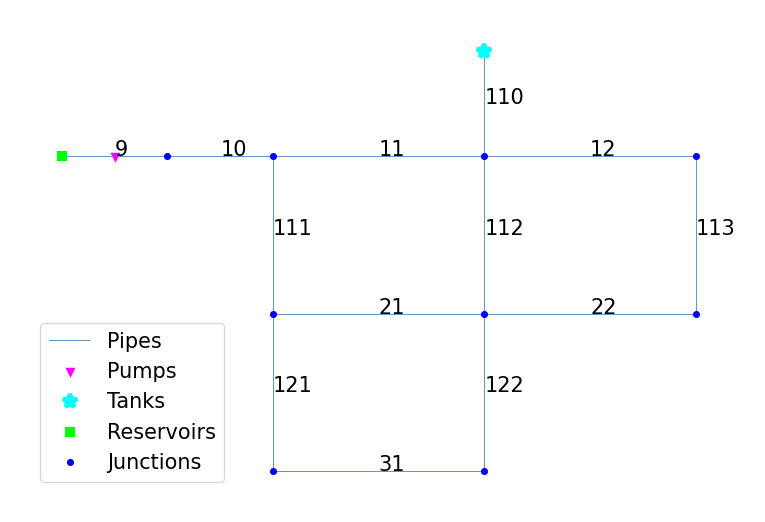

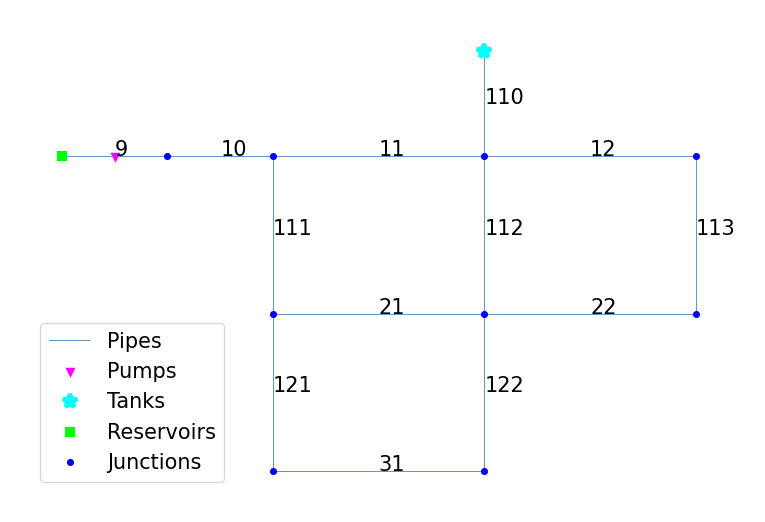

In [6]:
n.plot(linksID=True)

In [9]:
d=epanet('Net1.inp')

EPANET version 20200 loaded (EPyT version 1.1.8).
Input File Net1.inp loaded successfully.



In [8]:
fromNode=d.getNodeNameID(3)

In [9]:
print(fromNode)

12


In [10]:
toNode=d.getNodeNameID(7)

In [11]:
print(toNode)

23


In [12]:
cv_pipe1_index=d.addLinkPipeCV('CVPipe1',fromNode,toNode)

In [13]:
cv_pipe1_index

14

In [14]:
fromNode2=d.getNodeNameID(3)
toNode2=d.getNodeNameID(5)
pipe1_index=d.addLinkPipeCV('Pipe1',fromNode2,toNode2)

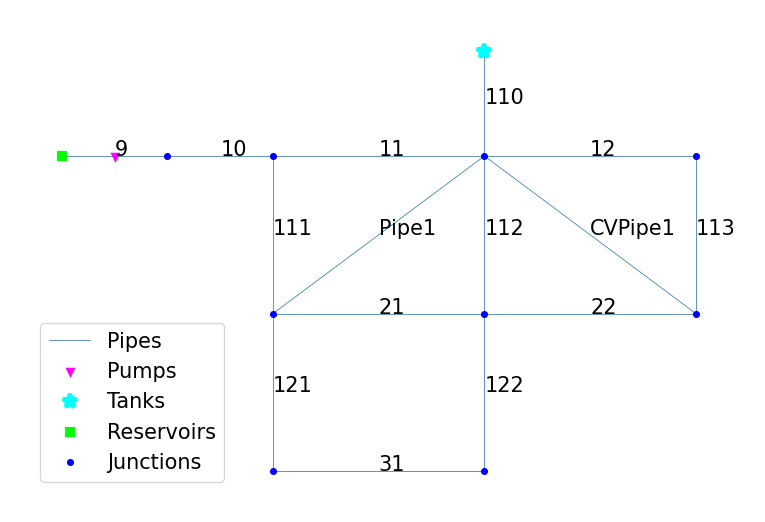

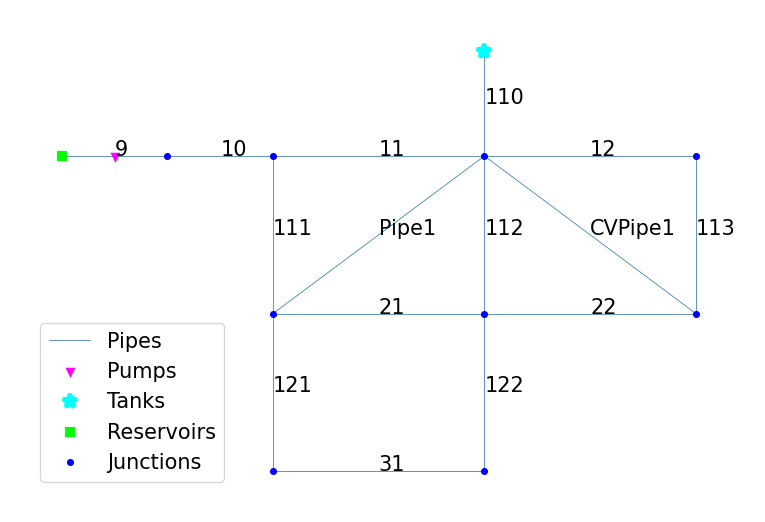

In [15]:
d.plot(linksID=True)

# Hydraulic and Quality analysis

In [10]:
d=epanet('Net1.inp')

EPANET version 20200 loaded (EPyT version 1.1.8).
Input File Net1.inp loaded successfully.



In [11]:
d.setQualityType('Chlorine','mg/L')

In [12]:
normalQuality=4
initialQuality=0.6
nodeIndex=d.getNodeReservoirIndex()[0]

In [13]:
print(nodeIndex)

10


In [14]:
d.setNodeInitialQuality(nodeIndex,[initialQuality])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/wahab901278/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_20626/1361695924.py", line 1, in <module>
    d.setNodeInitialQuality(nodeIndex,[initialQuality])
  File "/home/wahab901278/anaconda3/lib/python3.11/site-packages/epyt/epanet.py", line 8176, in setNodeInitialQuality
    self.__setEval('ENsetnodevalue', 'INITQUAL', 'NODE', value, *argv)
  File "/home/wahab901278/anaconda3/lib/python3.11/site-packages/epyt/epanet.py", line 11121, in __setEval
    eval(strFunc)
  File "<string>", line 1, in <module>
  File "/home/wahab901278/anaconda3/lib/python3.11/site-packages/epyt/epanet.py", line 15687, in ENsetnodevalue
    c_float(value))
    ^^^^^^^^^^^^^^
TypeError: must be real number, not list

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/wah

In [15]:
step=3600
d.setTimeHydraulicStep(step)
d.setTimeQualityStep(step)
d.setTimeReportingStep(step)

In [16]:
d.openHydraulicAnalysis()
d.openQualityAnalysis()
d.initializeHydraulicAnalysis(0)
d.initializeQualityAnalysis(d.ToolkitConstants.EN_NOSAVE)

In [17]:
T=[] # time
F=[]
P=[]
QN=[] # node quality
QL=[] # link quality

In [18]:
while step>0:
    t=d.runHydraulicAnalysis()
    qt=d.runQualityAnalysis()
    P.append(d.getNodePressure())
    F.append(d.getLinkFlows())
    QN.append(d.getNodeActualQuality())
    QL.append(d.getLinkActualQuality())
    step=d.nextHydraulicAnalysisStep()
    T.append(t)
    tstep=d.nextHydraulicAnalysisStep()
    qtstep=d.nextQualityAnalysisStep()
d.closeHydraulicAnalysis()
d.closeQualityAnalysis()

In [19]:
print(f"Pressure:\n{P}\n")
print(f"Flow:\n{F}\n")
print(f"Node Quality:\n{QN}\n")
print(f"Link Quality:\n{QL}\n")

Pressure:
[array([127.54072571, 119.25732422, 117.02125549, 118.66902161,
       117.6611557 , 118.75815582, 120.73696899, 115.86077881,
       110.79018402,   0.        ,  51.99599838]), array([129.27157593, 121.22599792, 119.66445923, 120.94216156,
       119.37660217, 120.85404968, 122.81413269, 117.03689575,
       111.91873169,   0.        ,  54.65485382]), array([130.32048035, 122.41929626, 121.44883728, 122.27597809,
       120.17688751, 121.93183899, 123.86997223, 117.17672729,
       111.9408493 ,   0.        ,  56.44916916]), array([130.72001648, 122.87389374, 122.41320038, 122.71820831,
       120.10773468, 122.05516815, 123.96739197, 116.33392334,
       110.92721558,   0.        ,  57.41799164]), array([131.23260498, 123.45714569, 122.59874725, 123.41821289,
       121.2882309 , 123.06261444, 125.00284576, 118.29238892,
       113.06181335,   0.        ,  57.59955597]), array([132.32250977, 124.6975174 , 123.52090454, 124.77659607,
       123.09690094, 124.65749359, 126.62

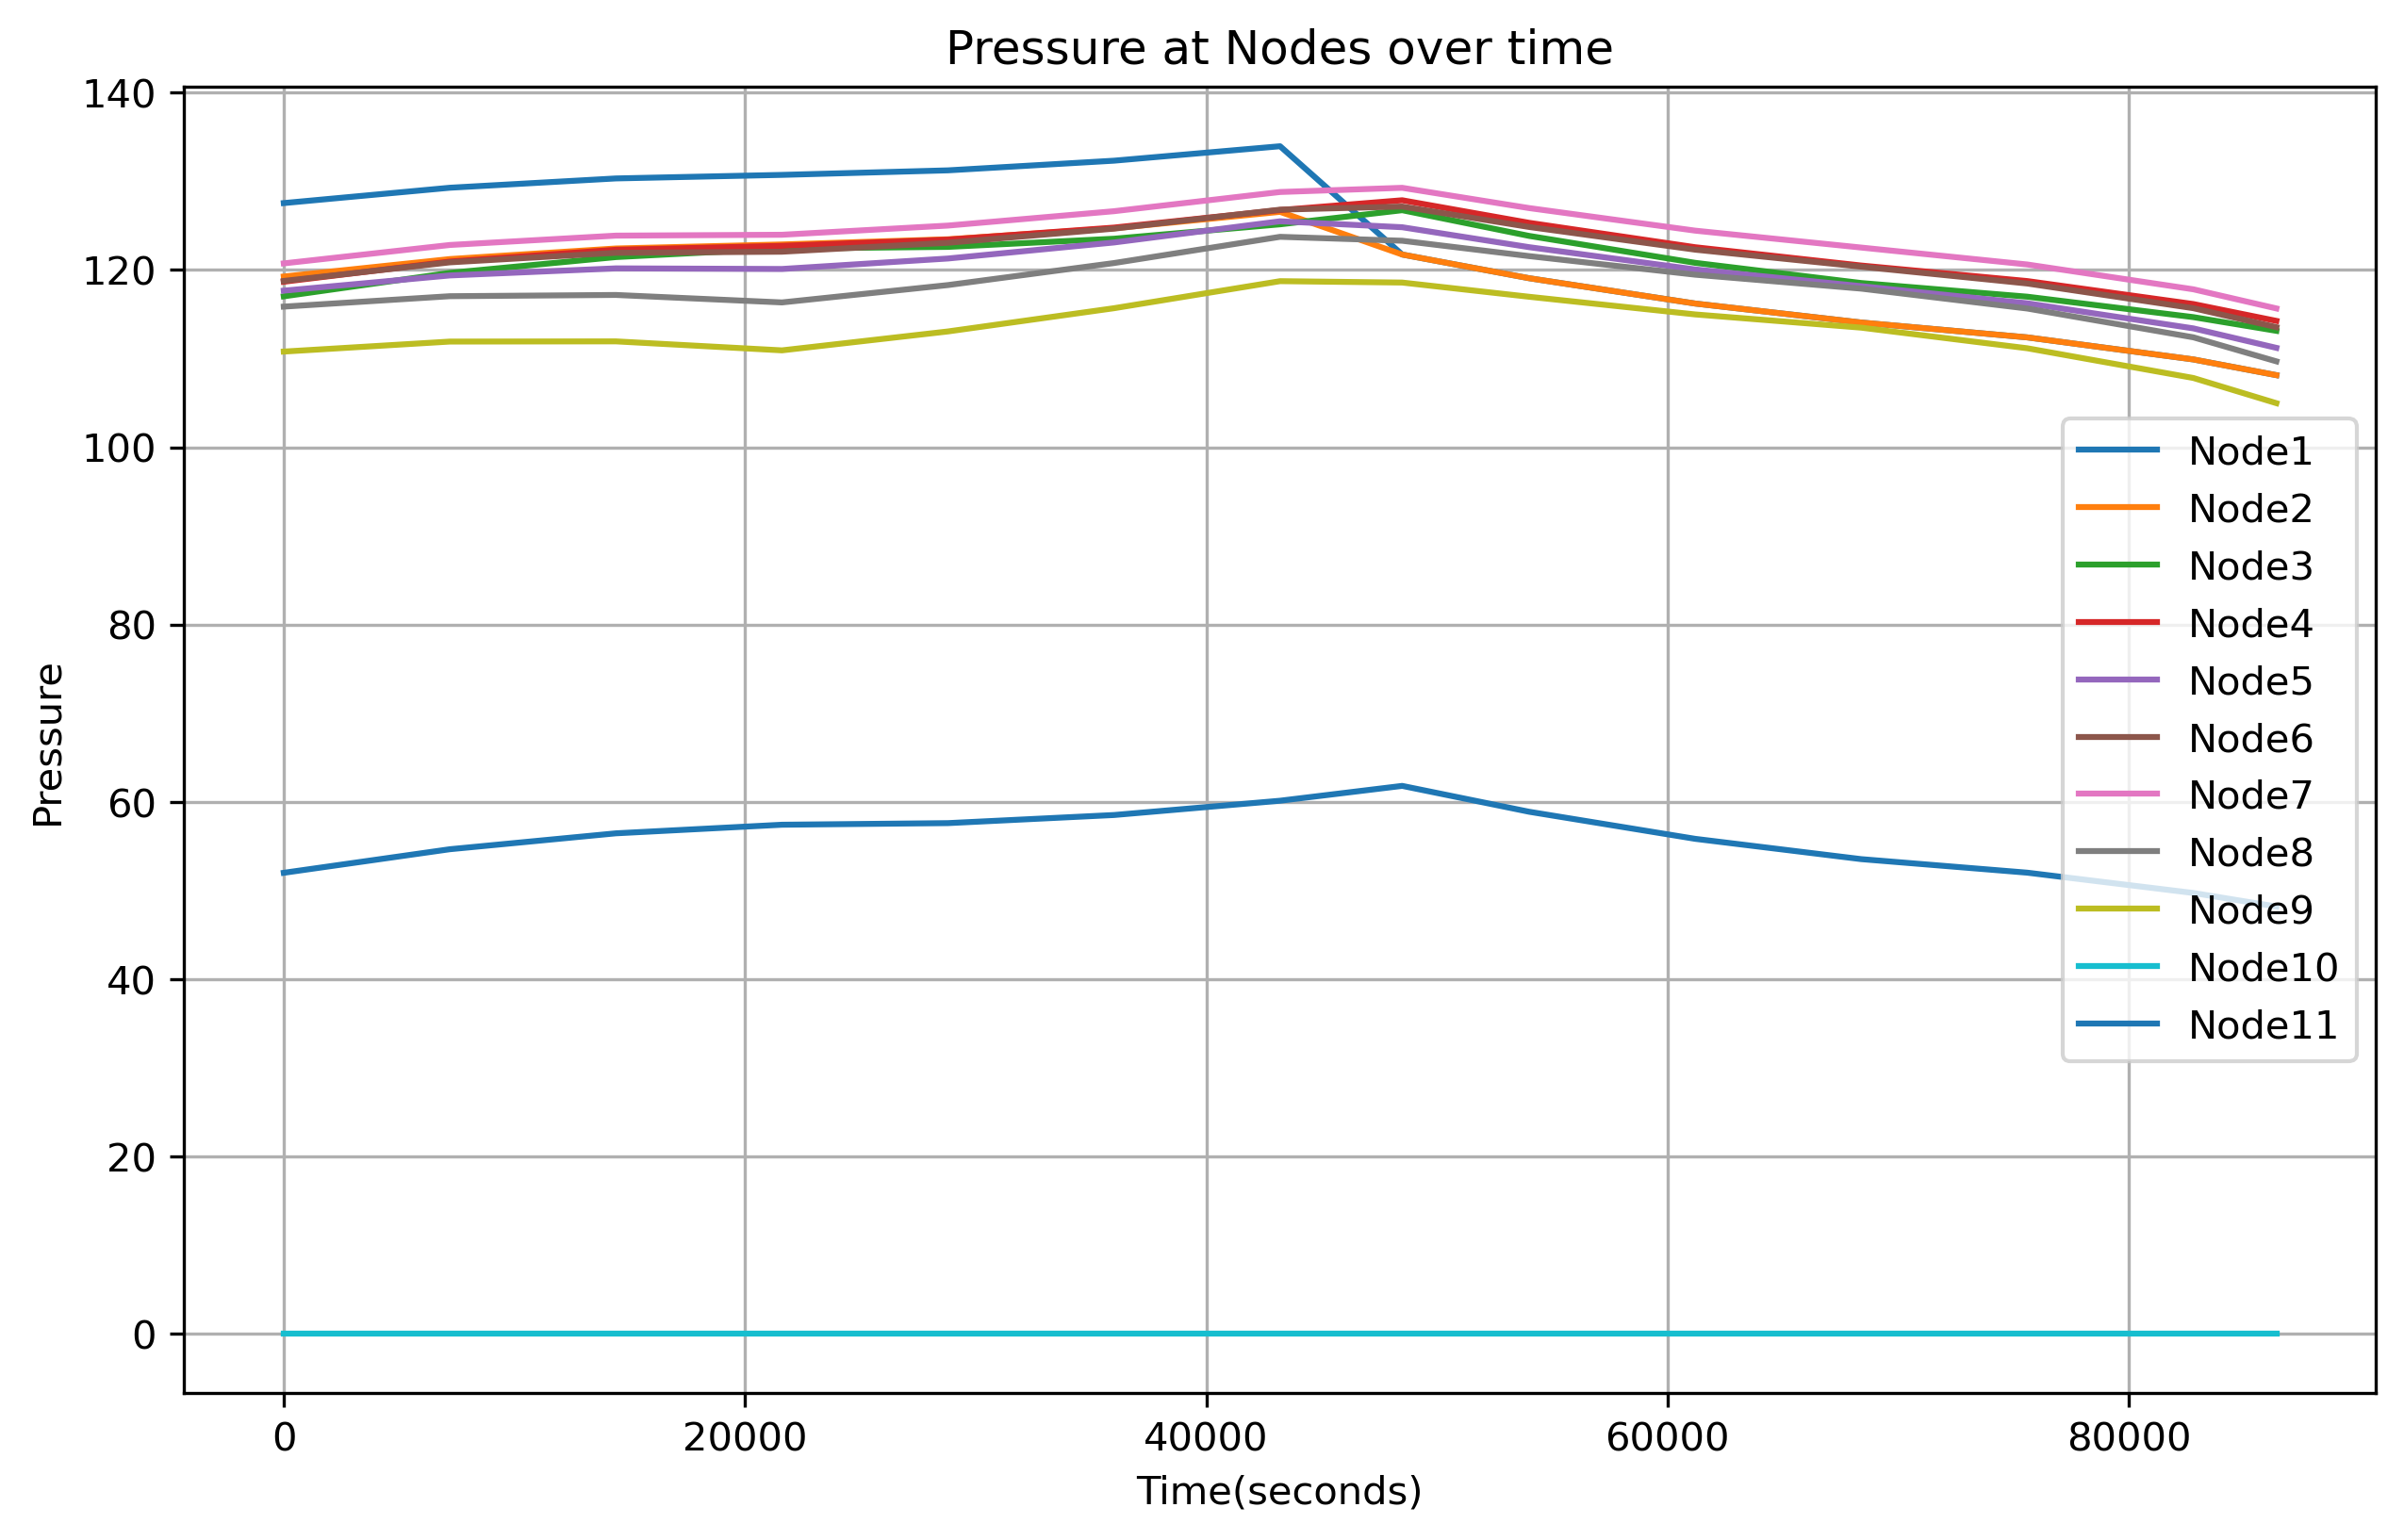

In [29]:
plt.figure(figsize=(10,6))
for i in range(len(P[0])):
    pressure=[P[t][i] for t in range(len(P))]
    plt.plot(T,pressure,label=f'Node{i+1}')
plt.xlabel('Time(seconds)')
plt.ylabel('Pressure')
plt.title('Pressure at Nodes over time')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
pressure_array=np.array(P)

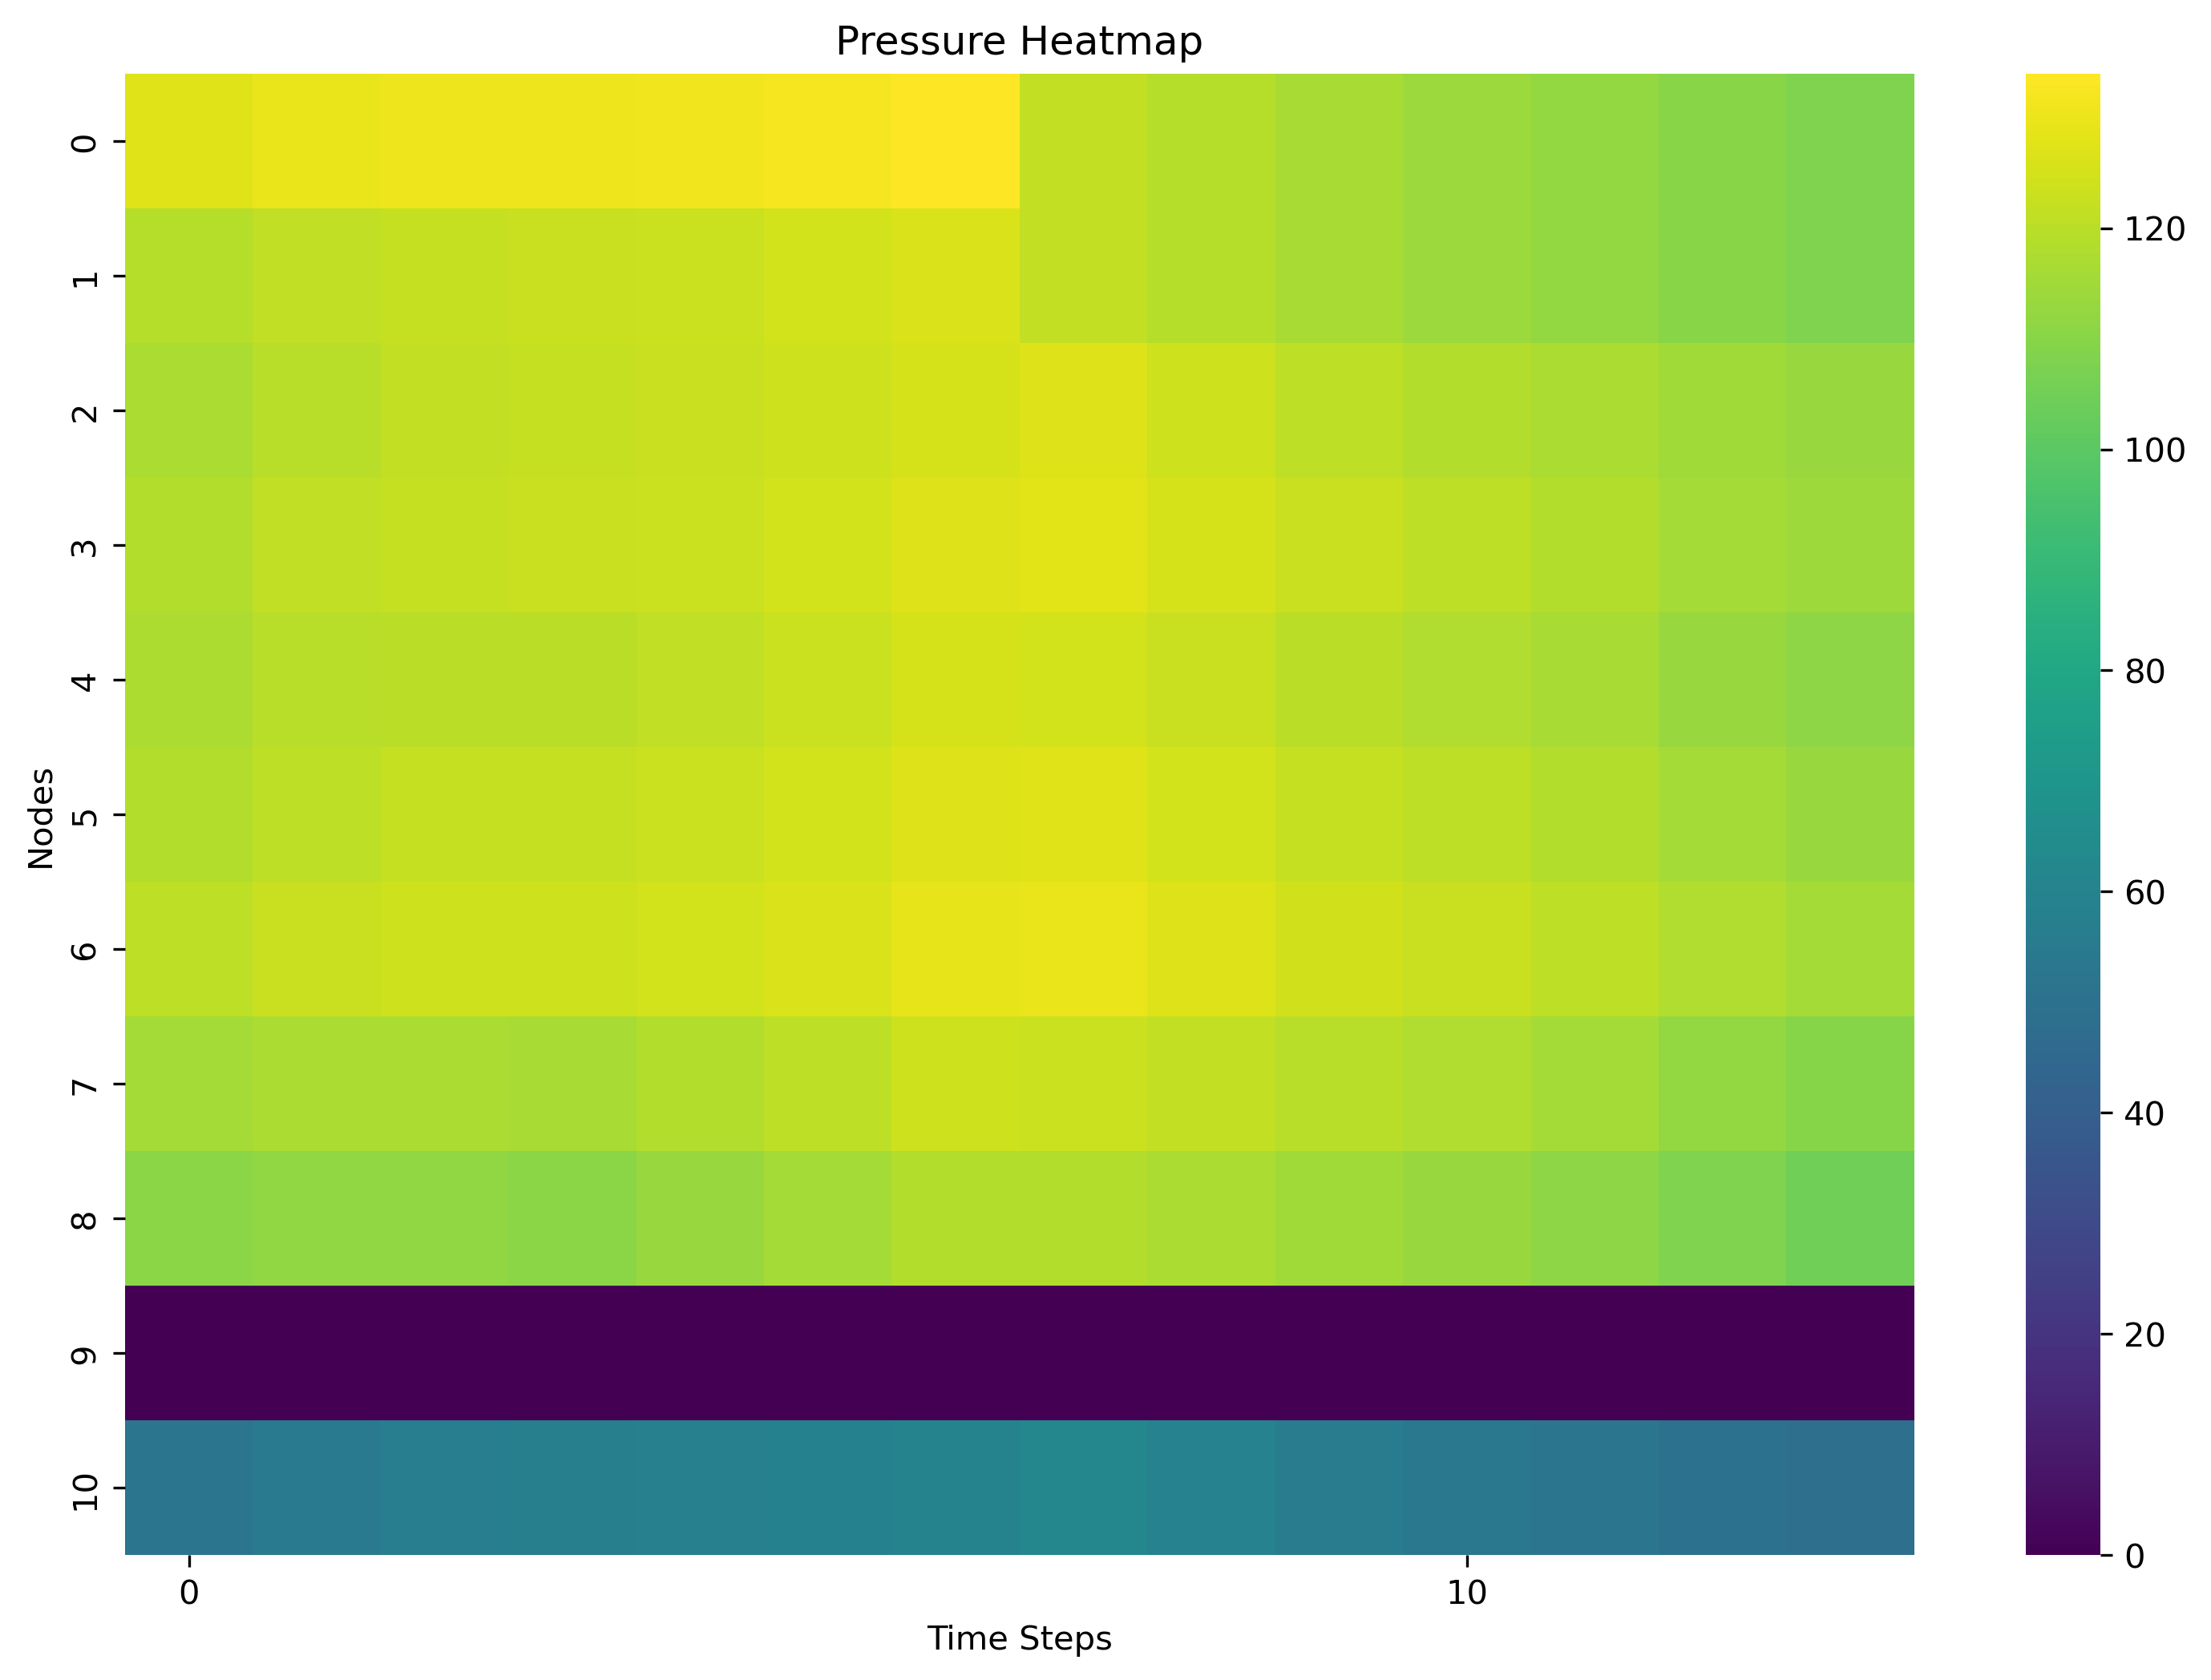

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(pressure_array.T,cmap='viridis',xticklabels=10,yticklabels=1)
plt.xlabel('Time Steps')
plt.ylabel('Nodes')
plt.title('Pressure Heatmap')
plt.show()

In [34]:
links_quality=np.array(QL)

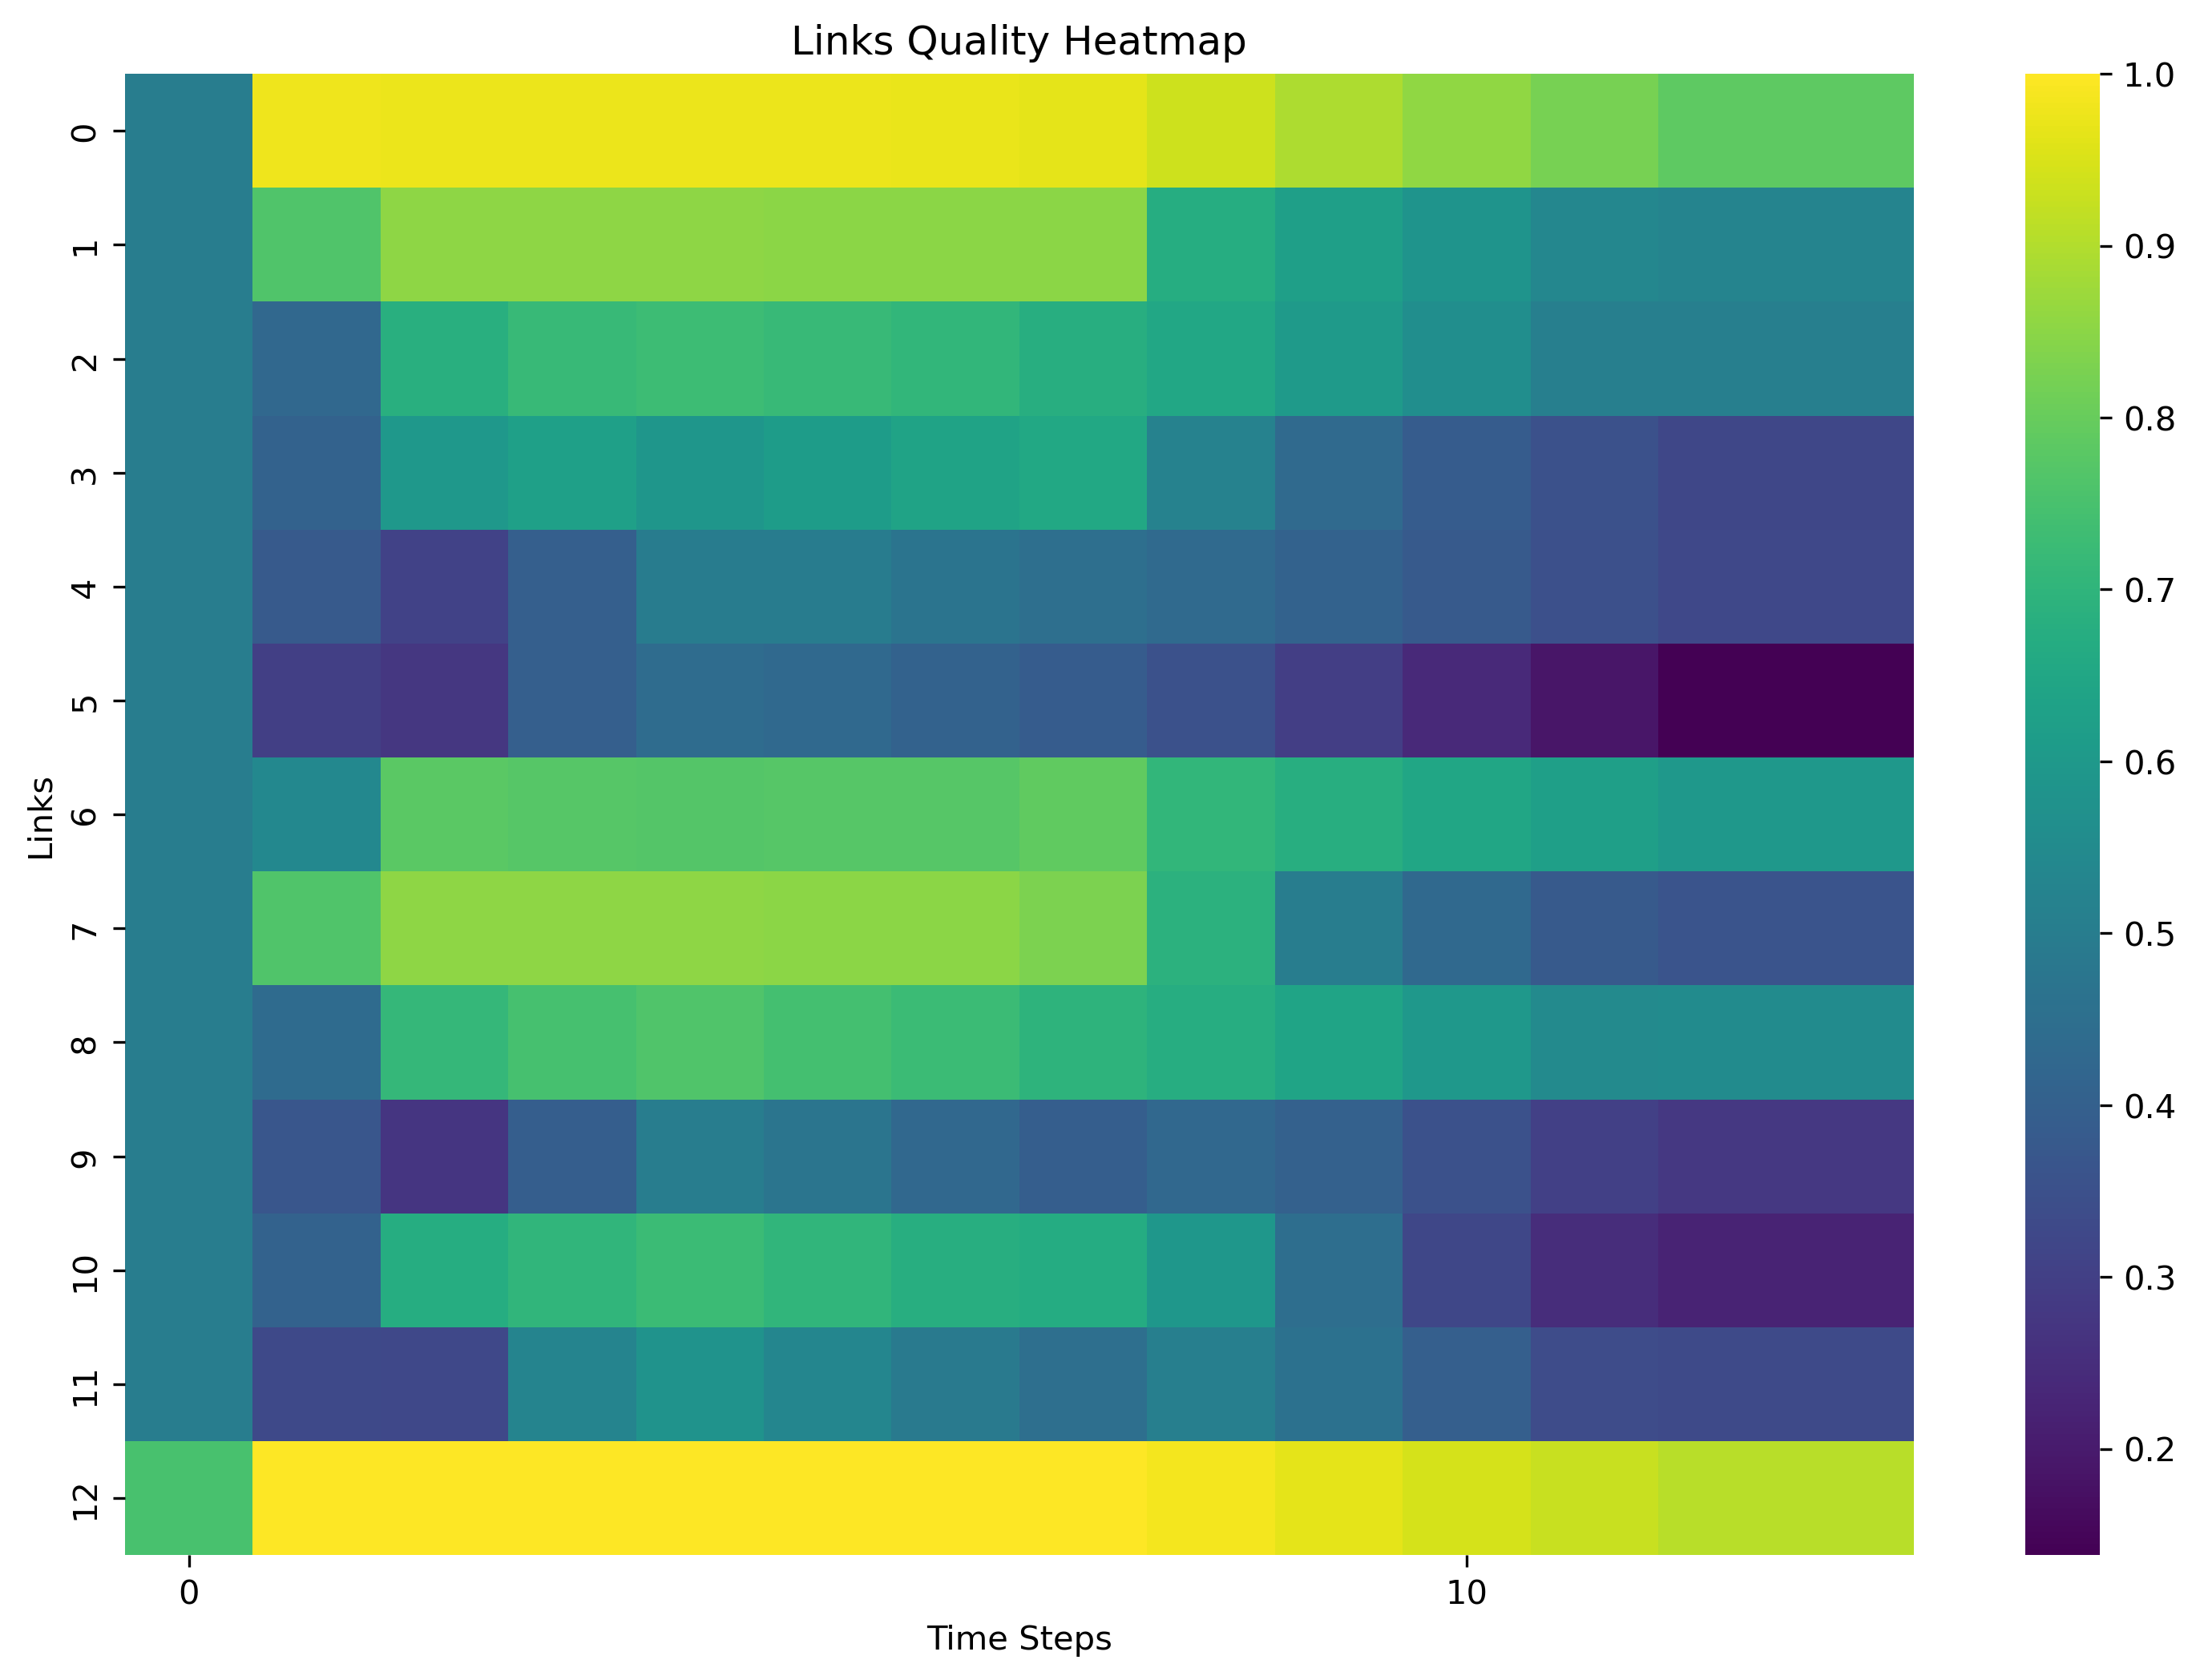

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(links_quality.T,cmap='viridis',xticklabels=10,yticklabels=1)
plt.xlabel('Time Steps')
plt.ylabel('Links')
plt.title('Links Quality Heatmap')
plt.show()